<a href="https://colab.research.google.com/github/SharonCamacho/pyladies-haz_que_tus_datos_hablen/blob/main/pyladies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Haz que tus datos hablen 🗨️📊📈

In [ ]:
#Importamos librerías
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [ ]:
#Veamos los datasets disponibles
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## Iris

In [ ]:
# Cargar el dataset
iris_df = sns.load_dataset("iris")

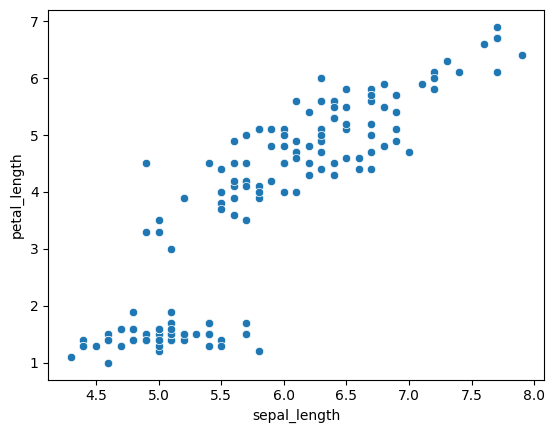

In [ ]:
# Crear un diagrama de dispersión
sns.scatterplot(
    data=iris_df,
    x="sepal_length",
    y="petal_length");

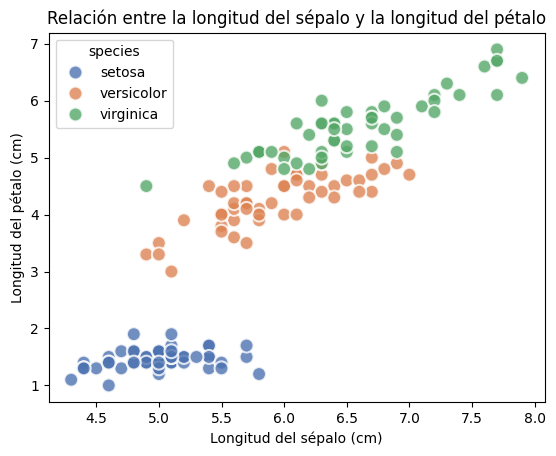

In [ ]:
# Mejorar el diagrama de dispersión
sns.scatterplot(
    data=iris_df,
    x="sepal_length",
    y="petal_length",
    hue="species",
    palette="deep",
    s=100, # Aumentar el tamaño de los puntos
    alpha=0.8, # Reducir la transparencia para superposición
    linewidth=1.5, # Aumentar el grosor del borde
    )

# Añadir un título y etiquetas a los ejes
plt.title("Relación entre la longitud del sépalo y la longitud del pétalo")
plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Longitud del pétalo (cm)")

# Mostrar la gráfica
plt.show()

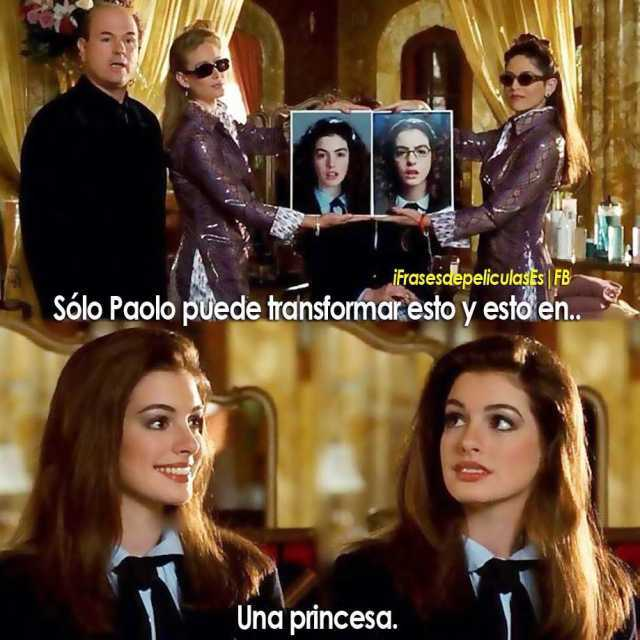


Antes                  vs                Después

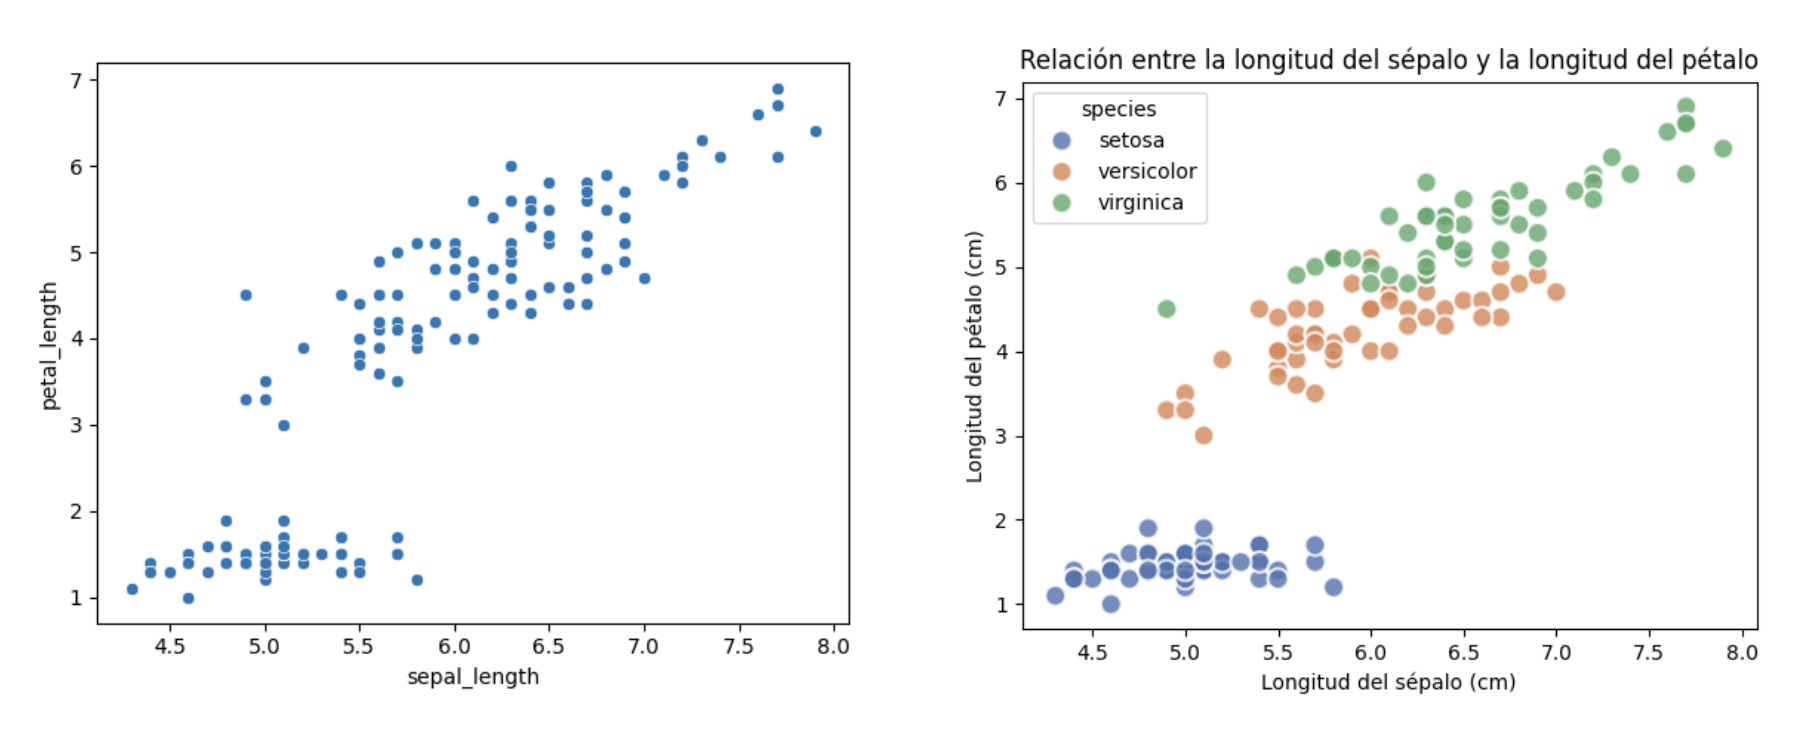

## Taxis

In [ ]:
#Carga el DataFrame
taxis = sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [ ]:
#Transformación Rápida
taxis['pickup_date'] = taxis['pickup'].dt.date
taxis = taxis[taxis['pickup_date'] != datetime.date(2019, 2, 28)]

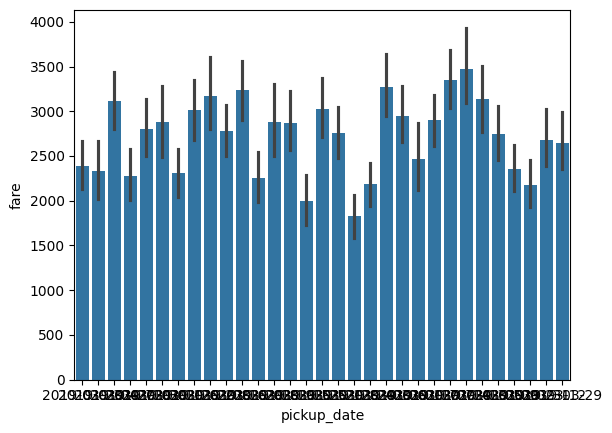

In [ ]:
#Primera gráfica
sns.barplot(taxis, x='pickup_date', y='fare', estimator='sum');

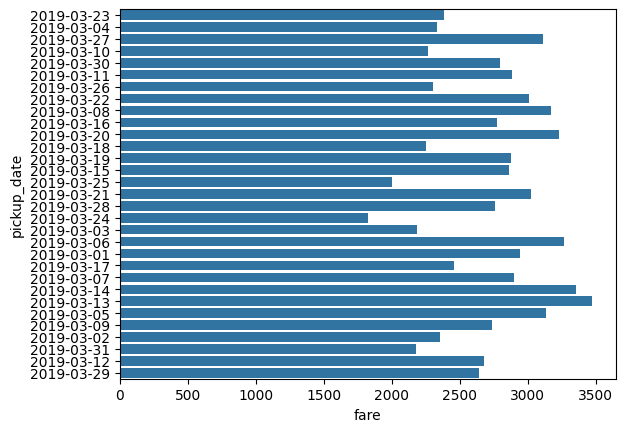

In [ ]:
#Cambio horizontal
sns.barplot(taxis, y='pickup_date', x='fare', estimator='sum', errorbar=('ci', False));

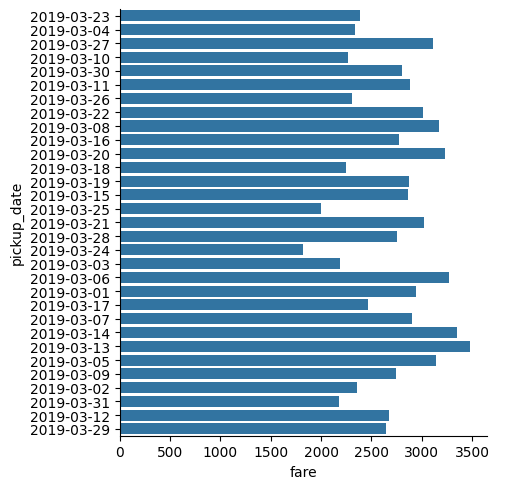

In [ ]:
#Cambio a nivel de figura
sns.catplot(taxis, y='pickup_date', x='fare', estimator='sum', errorbar=('ci', False), kind='bar');

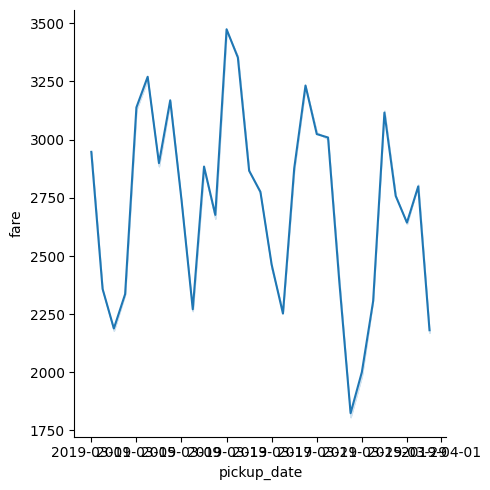

In [ ]:
#Tipo de gráfico más apropiado
sns.relplot(taxis, x='pickup_date', y='fare', estimator='sum', errorbar=('ci', False), kind='line');

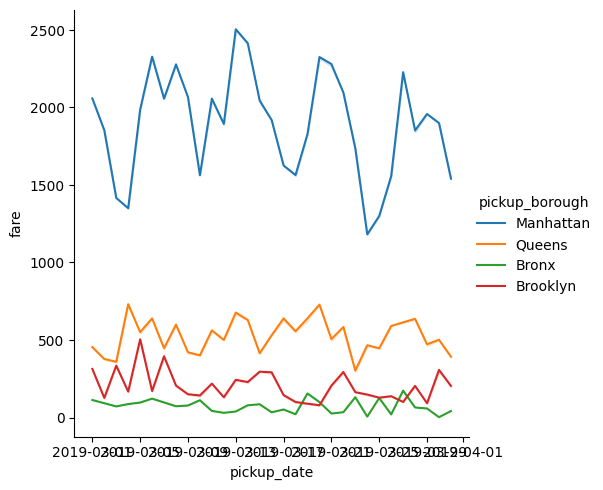

In [ ]:
#Agrego más información
sns.relplot(taxis, x='pickup_date', y='fare', estimator='sum', errorbar=('ci', False), kind='line', hue='pickup_borough');

[Aquí](https://seaborn.pydata.org/tutorial/color_palettes.html) puedes ver las paletas de colores

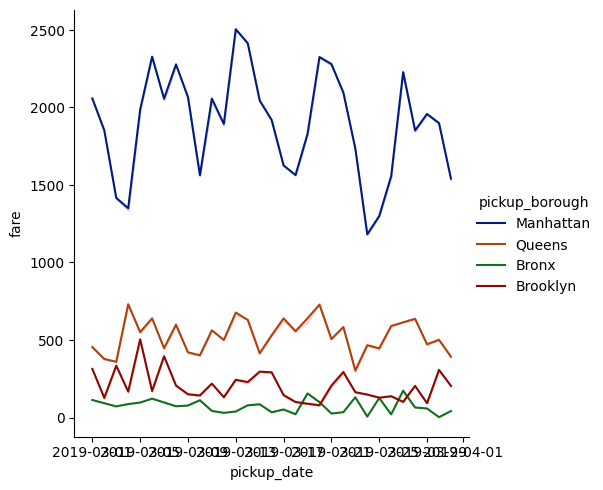

In [ ]:
#Cambio de Color
sns.relplot(taxis, x='pickup_date', y='fare', estimator='sum', errorbar=('ci', False), kind='line', hue='pickup_borough', palette='dark');

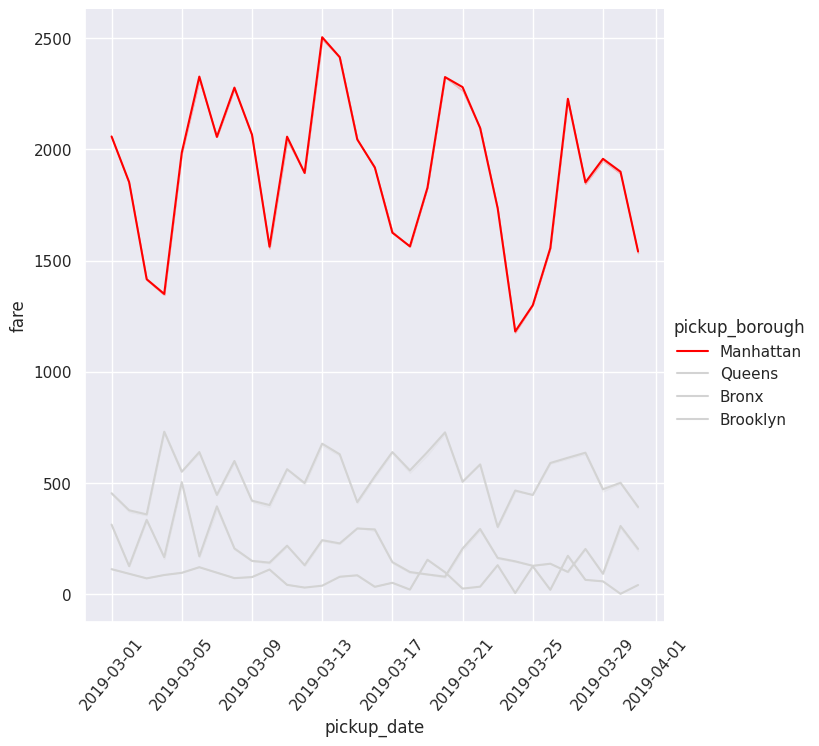

In [ ]:
#Atributos
#plt.figure(figsize=(18,5))

# Personalizar los colores
custom_palette = {"Manhattan": "red",
                  "Bronx": "#d3d3d3",
                  "Brooklyn": "#d3d3d3",
                  "Queens": "#d3d3d3"}

# Crear el gráfico
# Aquí con el atributo height cambiamos el tamaño del gráfico
sns.relplot(data=taxis, x='pickup_date', y='fare', kind='line',
            estimator='sum', errorbar=('ci', False),
            hue='pickup_borough', palette=custom_palette,
            height=5)

plt.xticks(rotation=50);

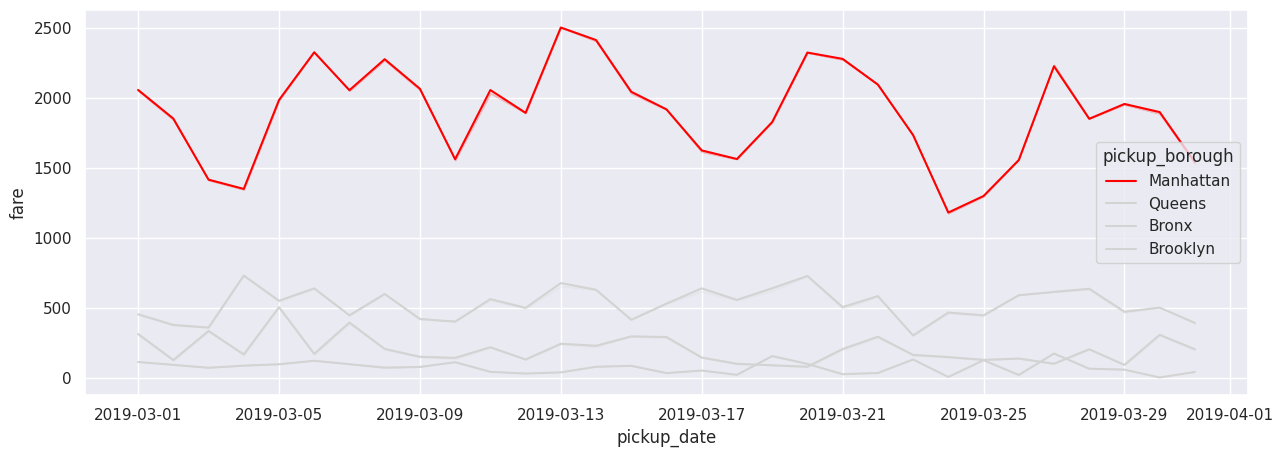

In [ ]:
#Cambiamos el gráfico a nivel de eje para poder modificar el tamaño de la gráfica

#Cambio el tamaño
plt.figure(figsize=(15,5))

# Personalizar los colores
custom_palette = {"Manhattan": "red",
                  "Bronx": "#d3d3d3",
                  "Brooklyn": "#d3d3d3",
                  "Queens": "#d3d3d3"}

# Crear el gráfico
sns.lineplot(data=taxis, x='pickup_date', y='fare',
            estimator='sum', errorbar=('ci', False),
            hue='pickup_borough', palette=custom_palette);

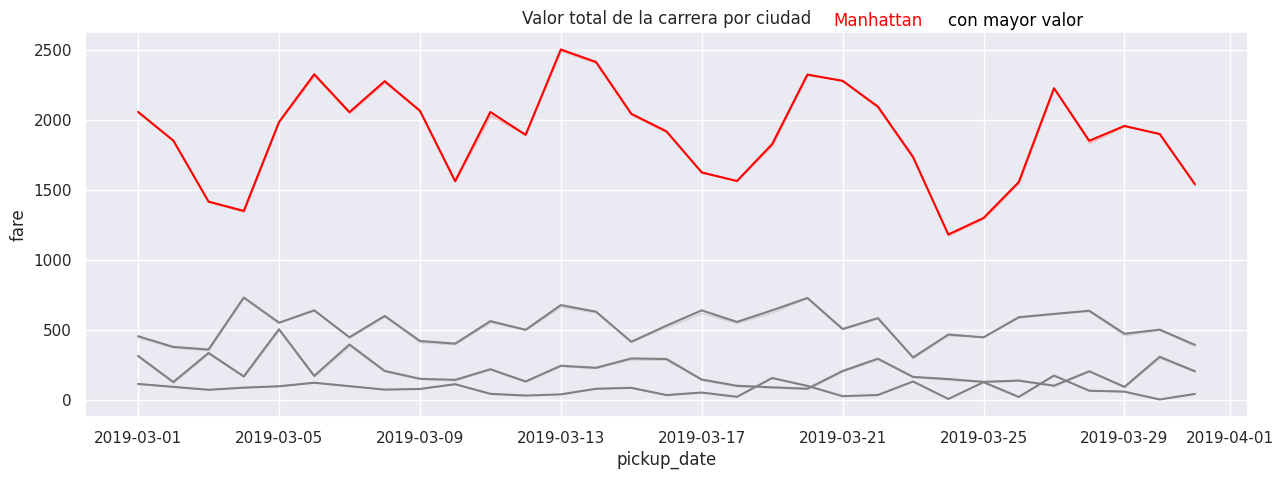

In [ ]:
#Ahora le quitamos la leyenda y ponemos la notación en el título

plt.figure(figsize=(15,5))

# Personalizar los colores
custom_palette = ['red', 'gray', 'gray', 'gray']

# Crear el gráfico
sns.lineplot(data=taxis, x='pickup_date', y='fare',
            estimator='sum', errorbar=('ci', False),
            hue='pickup_borough', palette=custom_palette, legend=False);

plt.title("Valor total de la carrera por ciudad")

# Agregar el texto adicional
plt.text(0.682, 1.03, 'Manhattan', color='red', ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.8, 1.03, 'con mayor valor', color='black', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

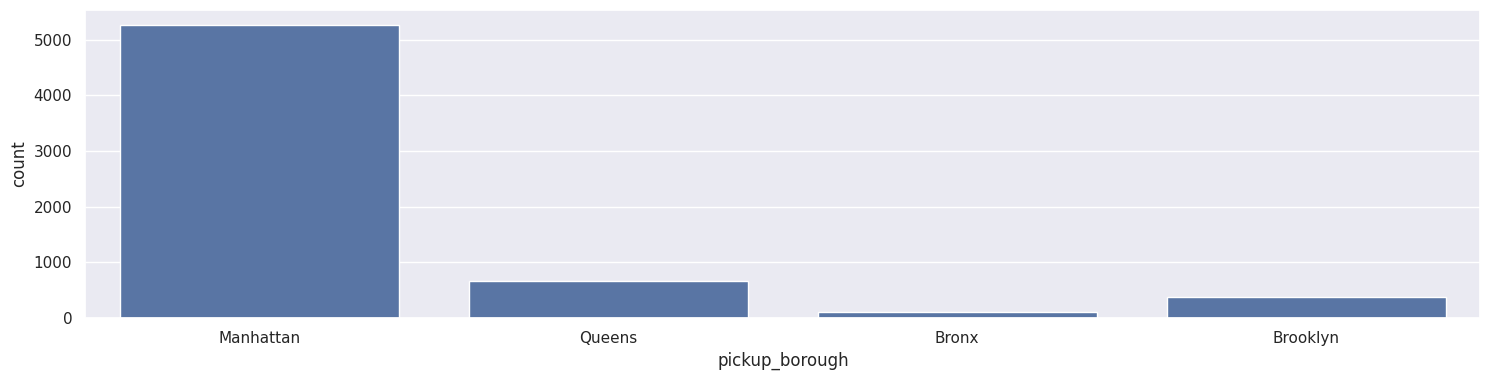

In [ ]:
#Gráfico inicial 2
sns.countplot(taxis, x='pickup_borough');

**Resultado**

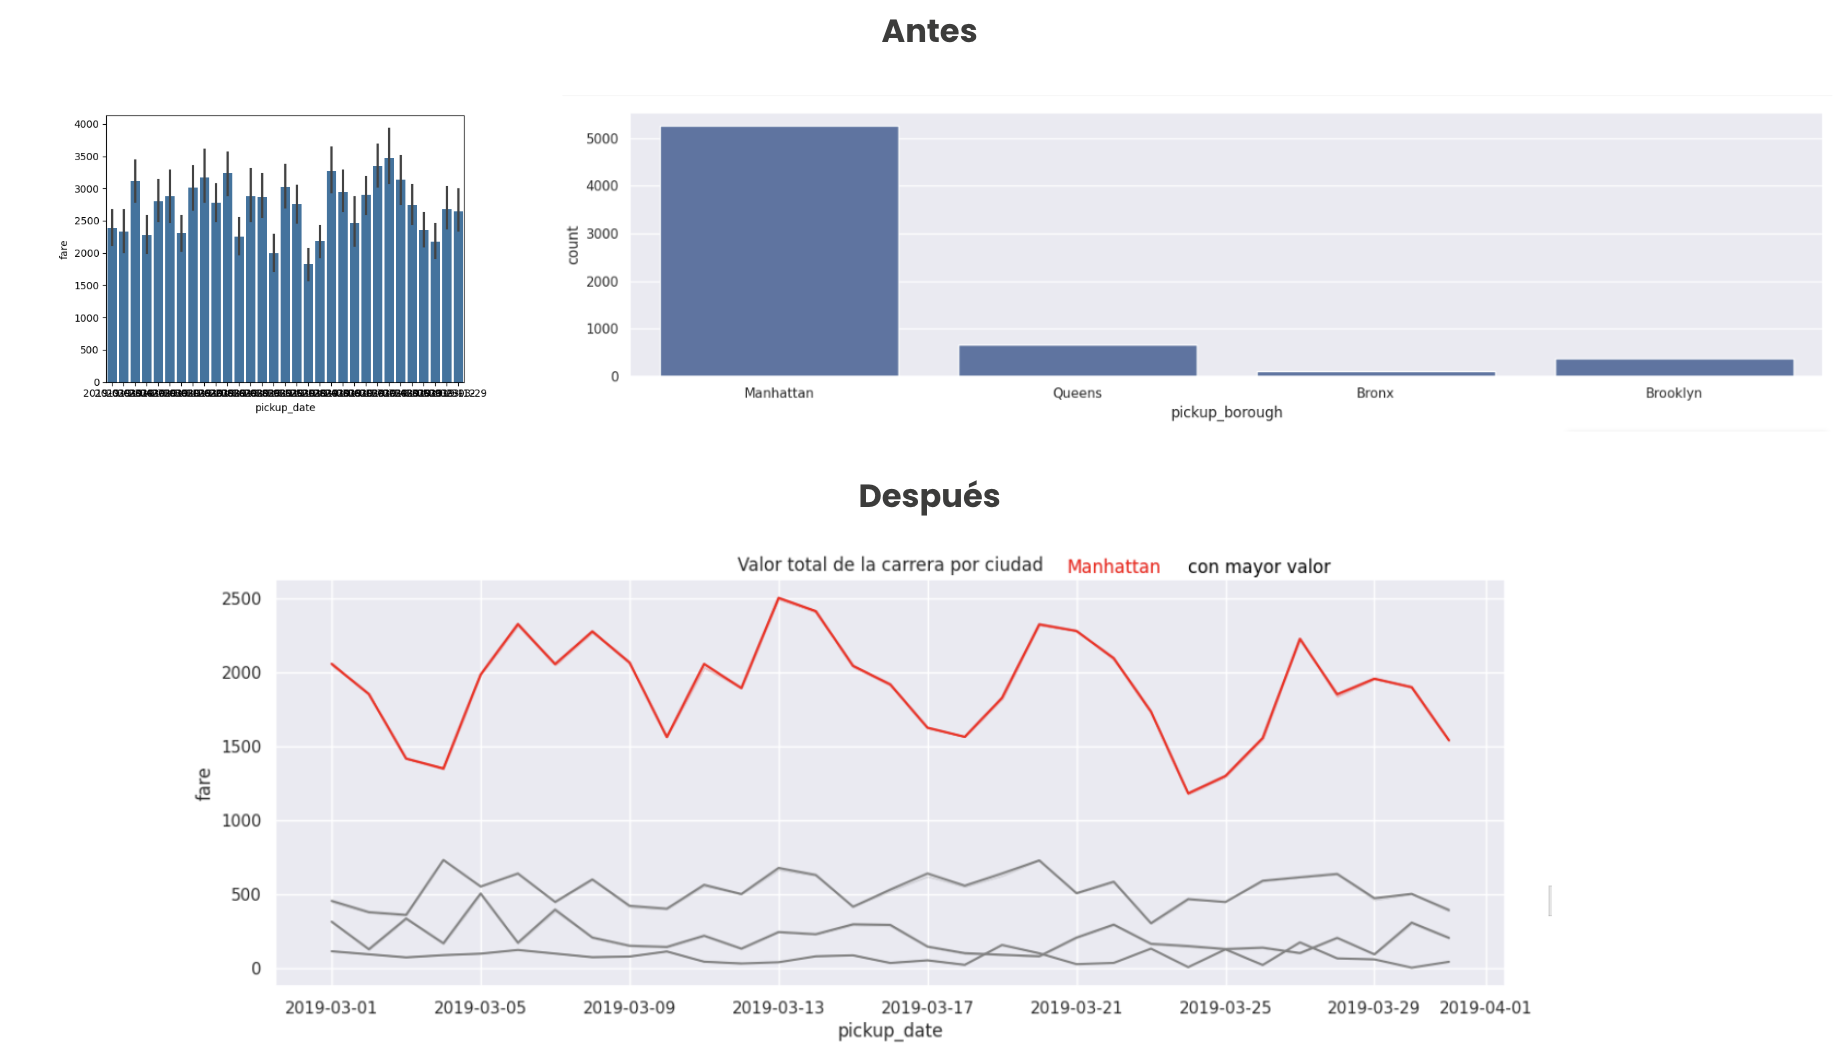

Ahora miremos como poner cada ciudad en una columna nos permite entender mejor el gráfico.

También podemos poner el color según el rango para indicar los datos donde el las propones son mayores a 8 USD

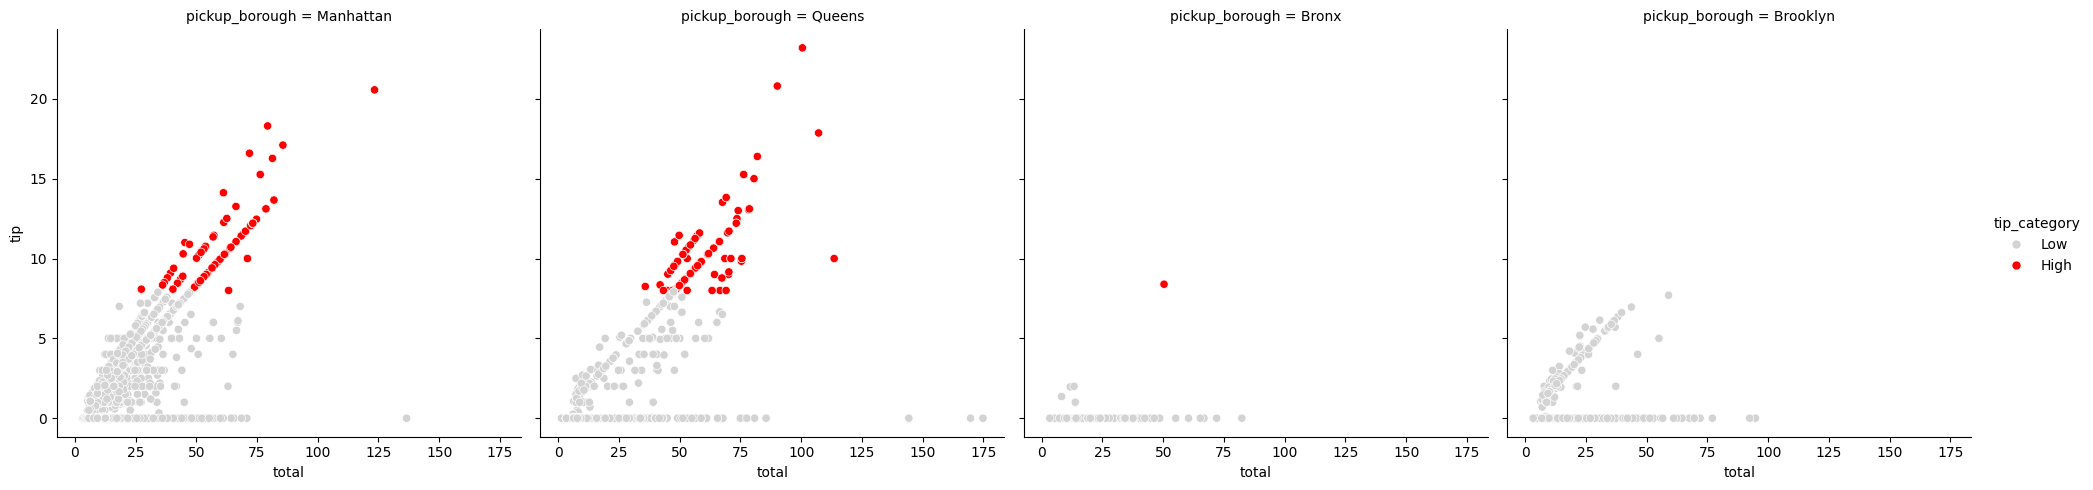

In [ ]:
#Color por monto de propina

import numpy as np

#Se define la función para poner el rango de la propina
def categorize_tip(tip):
    if tip < 8:
        return "Low"
    else:
        return "High"

#Se crea una columna para asignar el valor que retorna la función
taxis["tip_category"] = np.vectorize(categorize_tip)(taxis["tip"])

#Se define una paleta personalizada
custom_palette = {"High": "red", "Low": "#d3d3d3"}

#Se crea la gráfica a nivel de figura
sns.relplot(taxis, x='total', y='tip', col='pickup_borough', hue='tip_category',
            palette=custom_palette, legend="full");

## Accidentes de Carros

In [ ]:
# Cargar el dataset
car_crashes = sns.load_dataset("car_crashes")
car_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


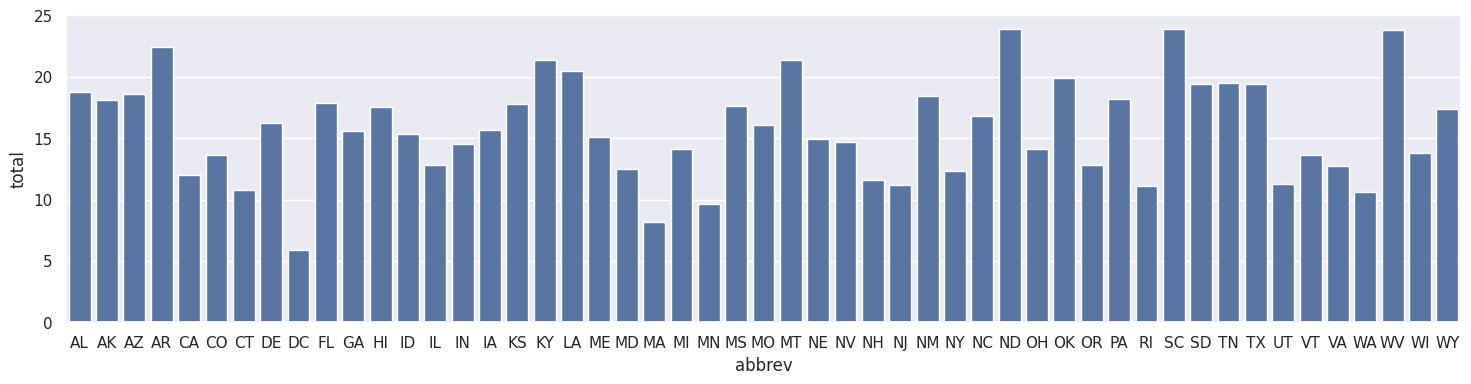

In [ ]:
#Se crea un gráfico de barras para mostrar el promedio de accidentes por cada estado
sns.barplot(car_crashes, x='abbrev', y='total');

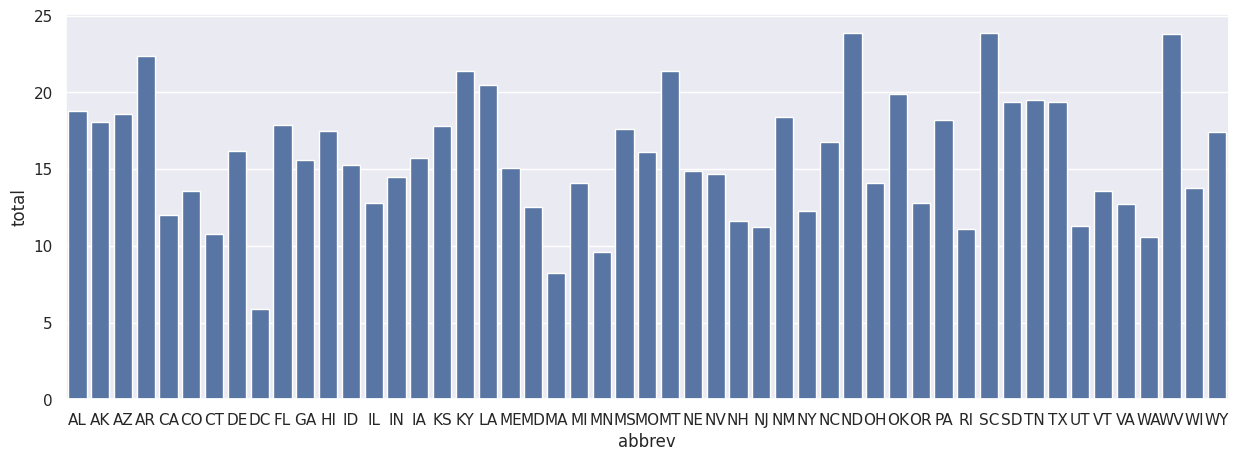

In [ ]:
#Se modifica el tamaño de la figura
plt.figure(figsize=(15,5))

#Se crea el gráfico
sns.barplot(car_crashes, x='abbrev', y='total');

<Axes: xlabel='abbrev', ylabel='total'>

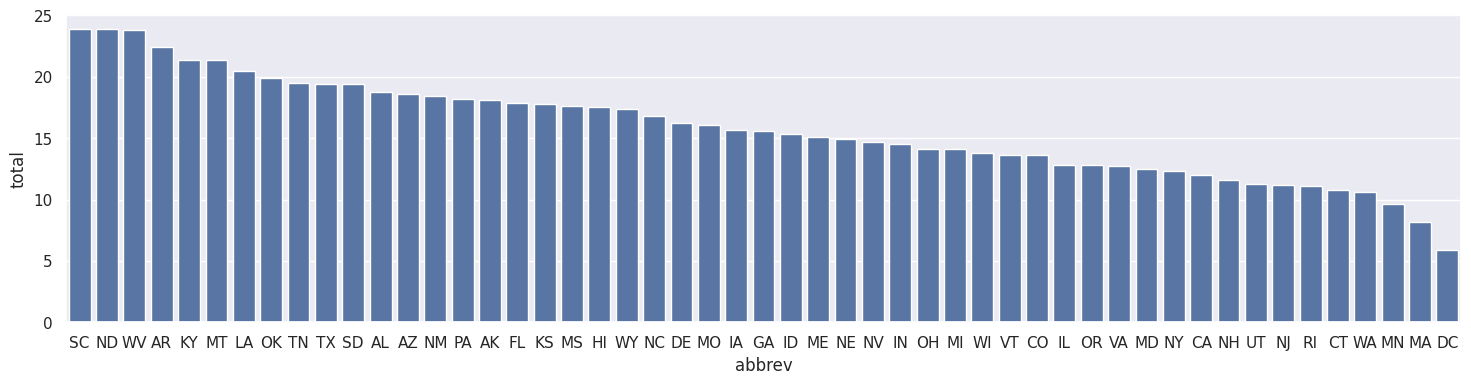

In [ ]:
#Se ordena el gráfico de mayor a menor
sns.barplot(car_crashes.sort_values('total', ascending=False), x='abbrev', y='total');

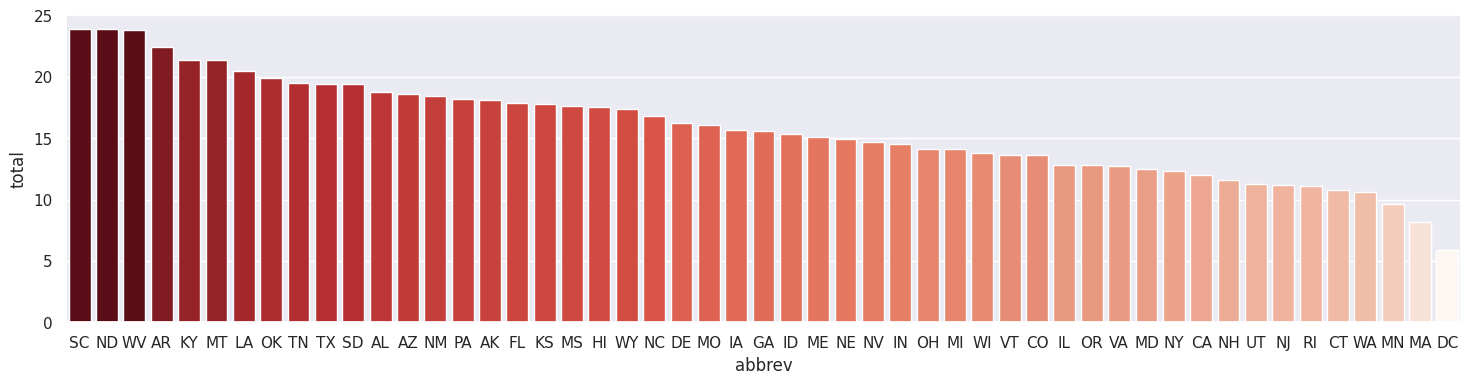

In [ ]:
#Se le asigna una paleta de color
sns.barplot(car_crashes.sort_values('total', ascending=False), x='abbrev', y='total', hue='total', palette="Reds", legend= False);

Gracias! 💁‍♀️